<a href="https://colab.research.google.com/github/dn-bit/time-series-using-prophet/blob/main/using_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import prophet



In [2]:
df=pd.read_csv("AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [6]:
df.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
#make model on prophet

from prophet import Prophet

model=Prophet()

In [8]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6e9bj9b/j2s64kvh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6e9bj9b/hxzydee1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35136', 'data', 'file=/tmp/tmpd6e9bj9b/j2s64kvh.json', 'init=/tmp/tmpd6e9bj9b/hxzydee1.json', 'output', 'file=/tmp/tmpd6e9bj9b/prophet_modelbut8e0hm/prophet_model-20230518052001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [10]:
#make future date

model_future=model.make_future_dataframe(periods=365)

model_future.head(20)

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
5,1949-06-01
6,1949-07-01
7,1949-08-01
8,1949-09-01
9,1949-10-01


In [11]:
prediction=model.predict(model_future)

prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,521.160458,471.163940,528.862501,520.553285,521.761643,-21.379120,-21.379120,-21.379120,-21.379120,-21.379120,-21.379120,0.0,0.0,0.0,499.781338
505,1961-11-28,521.261412,467.672343,525.241856,520.651669,521.864817,-23.081524,-23.081524,-23.081524,-23.081524,-23.081524,-23.081524,0.0,0.0,0.0,498.179888
506,1961-11-29,521.362366,465.616806,522.436045,520.750053,521.967991,-25.504632,-25.504632,-25.504632,-25.504632,-25.504632,-25.504632,0.0,0.0,0.0,495.857734
507,1961-11-30,521.463320,464.956255,520.177247,520.848437,522.071165,-28.606886,-28.606886,-28.606886,-28.606886,-28.606886,-28.606886,0.0,0.0,0.0,492.856434
508,1961-12-01,521.564274,460.904664,517.148825,520.945485,522.174339,-32.329021,-32.329021,-32.329021,-32.329021,-32.329021,-32.329021,0.0,0.0,0.0,489.235253


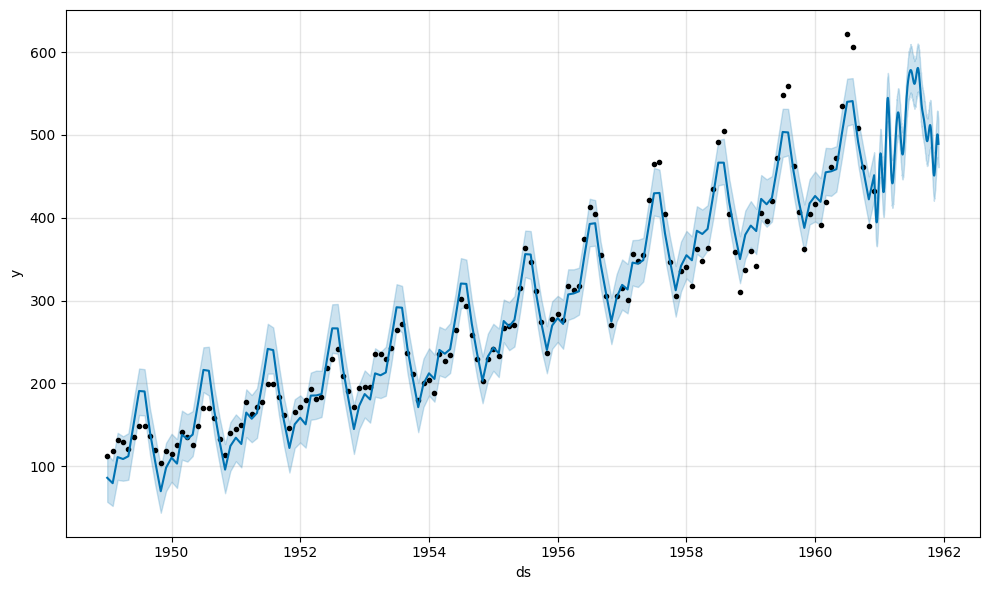

In [13]:
model.plot(prediction)
plt.show()

In [16]:
#cross validation

from prophet.diagnostics import cross_validation

df_cv=cross_validation(model,initial='730 days',period='180 days',horizon='365 days')
df_cv.head()

INFO:prophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6e9bj9b/ze5e9cnl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6e9bj9b/8_cryqxk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62069', 'data', 'file=/tmp/tmpd6e9bj9b/ze5e9cnl.json', 'init=/tmp/tmpd6e9bj9b/8_cryqxk.json', 'output', 'file=/tmp/tmpd6e9bj9b/prophet_model0jad6me3/prophet_model-20230518052138.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:21:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6e9bj9b/1odr32qe.json
DEBUG:cmdstanpy:input tempfi

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.068822,157.827660,158.305568,150,1951-01-18
1,1951-03-01,171.627833,170.846541,172.429896,178,1951-01-18
2,1951-04-01,159.755228,158.180073,161.380045,163,1951-01-18
3,1951-05-01,145.282900,142.697729,147.783603,172,1951-01-18
4,1951-06-01,180.701620,177.082118,184.180117,178,1951-01-18


In [17]:
from prophet.diagnostics import performance_metrics

df_per=performance_metrics(df_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1089.643210,33.009744,25.890414,0.078512,0.074049,0.079559,0.227273
1,42 days,1015.128499,31.861081,25.223152,0.076731,0.074049,0.077424,0.181818
2,46 days,910.102003,30.167897,24.646539,0.078631,0.079613,0.078377,0.136364
3,47 days,1049.360969,32.393842,26.822306,0.081630,0.085738,0.081787,0.136364
4,48 days,1038.934840,32.232512,26.277208,0.079749,0.085738,0.079971,0.181818
...,...,...,...,...,...,...,...,...
165,359 days,769.405330,27.738157,21.674672,0.068817,0.061810,0.068432,0.295455
166,360 days,772.940242,27.801803,21.957148,0.069687,0.061810,0.069320,0.272727
167,362 days,865.502215,29.419419,23.207715,0.068741,0.061810,0.068877,0.272727
168,364 days,838.733265,28.960892,22.131314,0.065805,0.049838,0.066040,0.272727


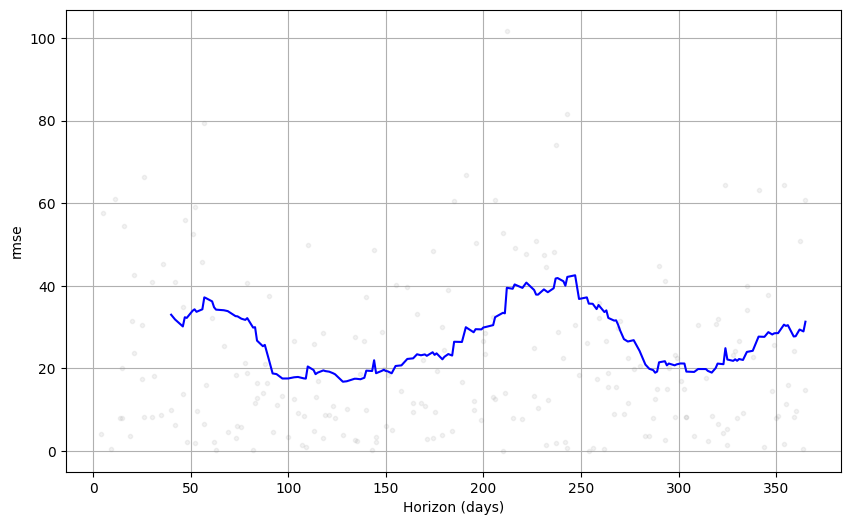

In [23]:
from prophet.plot import plot_cross_validation_metric,plot_components

plott=plot_cross_validation_metric(df_cv,metric='rmse')

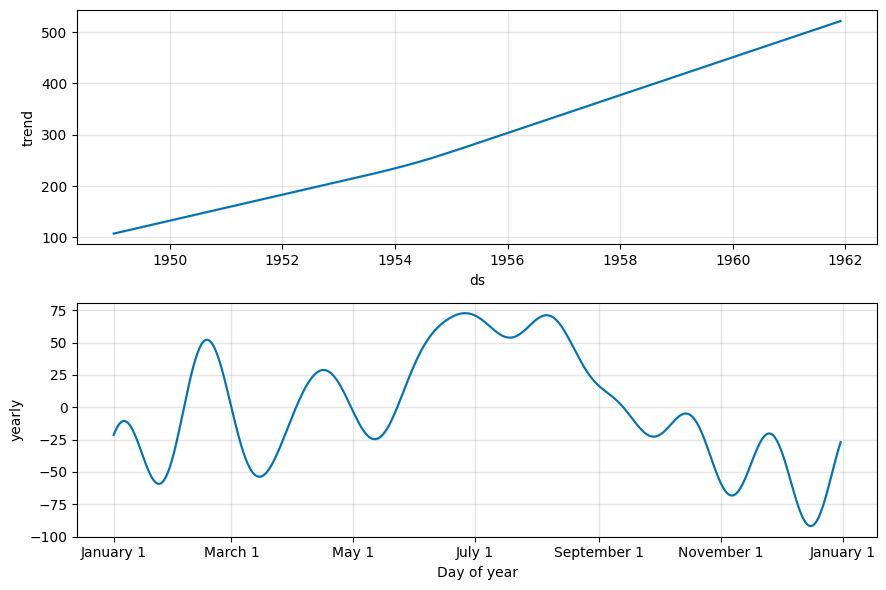

In [25]:
plot_components(model,prediction)
plt.show()

In [27]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, prediction)



In [28]:
plot_components_plotly(model, prediction)

In [31]:
df.tail(20)

,ds,y
124,1959-05,420
125,1959-06,472
126,1959-07,548
127,1959-08,559
128,1959-09,463
129,1959-10,407
130,1959-11,362
131,1959-12,405
132,1960-01,417
133,1960-02,391
